# Importing Modules

In [1]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

import patsy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Introduction to Statistical Modeling

# Defining Statistical Models with Patsy

In [2]:
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [4]:
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -1.11022302e-15])

In [5]:
data = {"y": y, "x1": x1, "x2": x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [6]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [7]:
type(X)

patsy.design_info.DesignMatrix

In [8]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [9]:
df_data = pd.DataFrame(data)
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [10]:
model = sm.OLS(y, X)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -7.771561e-16
dtype: float64

In [11]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -7.771561e-16
dtype: float64

In [12]:
from collections import defaultdict
data = defaultdict(lambda: np.array([]))
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [13]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [14]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [15]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [16]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [17]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [18]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [19]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [20]:
patsy.dmatrices("y ~ a**2", data=data)[1].design_info.term_names

['Intercept', 'a']

In [21]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [22]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [23]:
z = lambda x1, x2: x1+x2
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

In [24]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [25]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [26]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [27]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


# Linear Regression

In [28]:
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y_true(x1, x2):
    return 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)

In [29]:
e = 0.5 * np.random.randn(N)
data["y"] = data["y_true"] + e
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     36.61
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.42e-12
Time:                        14:15:10   Log-Likelihood:                -292.35
No. Observations:                 100   AIC:                             590.7
Df Residuals:                      97   BIC:                             598.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9263      0.477      4.036      0.0

In [30]:
result.rsquared

0.43017932712440243

In [31]:
result.resid.head()

0   -2.024748
1   -3.072955
2   -0.127484
3   -0.460674
4    0.027401
dtype: float64

In [32]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.9759168009305603

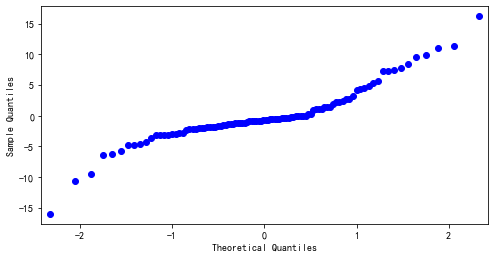

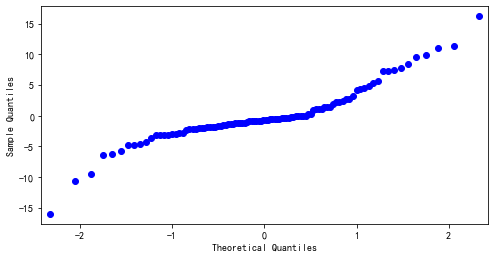

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [34]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5311.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          1.61e-106
Time:                        14:15:14   Log-Likelihood:                -64.577
No. Observations:                 100   AIC:                             137.2
Df Residuals:                      96   BIC:                             147.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0035      0.050     20.019      0.0

In [35]:
result.rsquared

0.9940113034031047

In [36]:
z, p = stats.normaltest(result.fittedvalues.values)
p

2.1404978147852566e-10

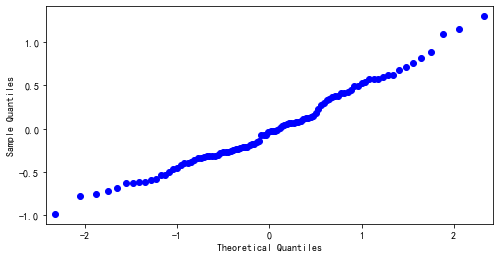

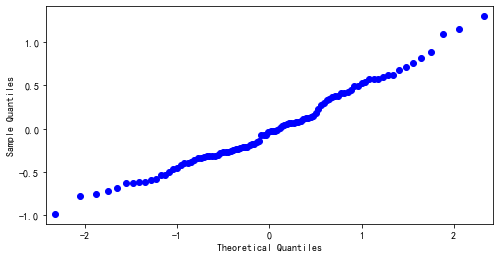

In [37]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [38]:
result.params

Intercept    1.003485
x1           2.097062
x2           3.013653
x1:x2        4.019228
dtype: float64

In [39]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

y_pred = result.predict(new_data)

y_pred.shape

(2500,)

In [40]:
y_pred = y_pred.values.reshape(50, 50)

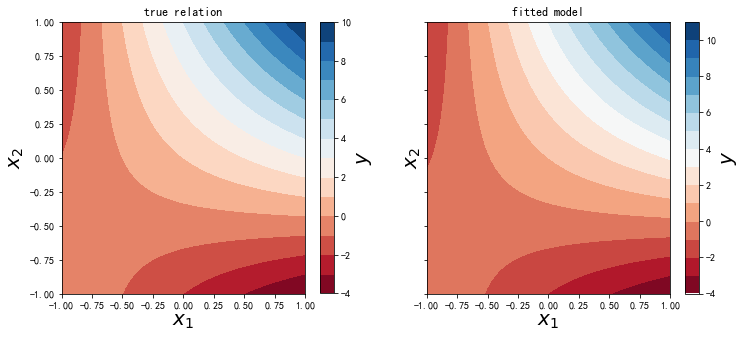

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

# Example Datasets

In [42]:
dataset = statsmodels.api.datasets.get_rdataset("Icecream", "Ecdat")

In [43]:
dataset.title

'Ice Cream Consumption'

In [44]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cons    30 non-null     float64
 1   income  30 non-null     int64  
 2   price   30 non-null     float64
 3   temp    30 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


In [45]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)
result = model.fit()

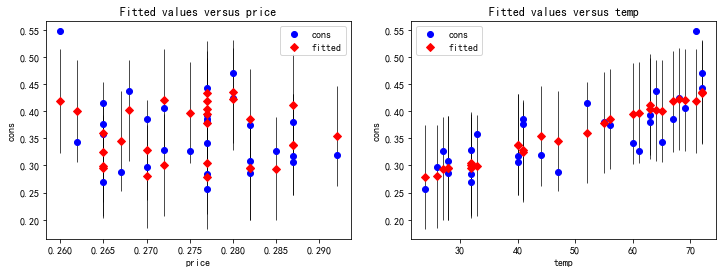

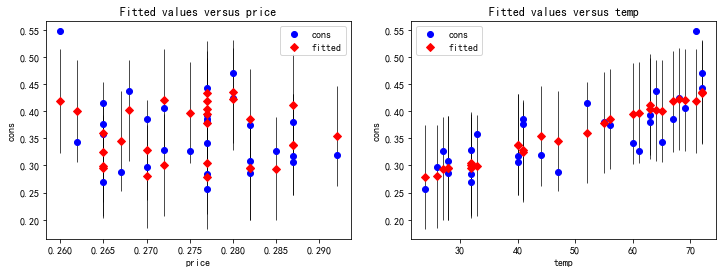

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

# Discrete Regression

# Logistic Regression

In [43]:
df = statsmodels.api.datasets.get_rdataset("iris").data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [52]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

In [53]:
df_subset.Species = df_subset.Species.map({"versicolor": 1,"virginica": 0})

In [54]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length",
                          "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length",
                          "Petal.Width": "Petal_Width"},
                 inplace=True)

In [55]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [56]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [57]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [58]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.8517
Time:                        14:01:26   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [59]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


In [60]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})
df_new["P-Species"] = result.predict(df_new)

In [61]:
df_new["P-Species"].head(3)

0    0.770662
1    0.911350
2    0.998076
Name: P-Species, dtype: float64

In [62]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [63]:
params = result.params
alpha0 = -params['Intercept']/params['Petal_Width']
alpha1 = -params['Petal_Length']/params['Petal_Width']

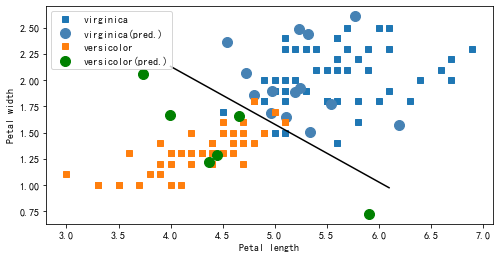

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# species virginica
ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values,
        's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica(pred.)')

# species versicolor
ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values,
        's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor(pred.)')

# boundary line
_x = np.array([4.0, 6.1])
ax.plot(_x, alpha0 + alpha1 * _x, 'k')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()

# Poisson Model

In [67]:
dataset = sm.datasets.get_rdataset("discoveries")
df = dataset.data.set_index("time").rename(columns={"values":"discoveries"})
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
value,5,3,0,2,0,3,2,3,6,1


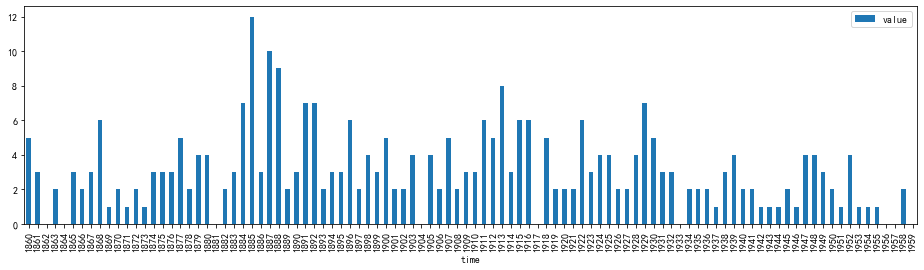

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)

In [128]:
model = smf.poisson("discoveries ~ 1", data=df)

In [129]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 7


In [130]:
print(result.summary())

                          Poisson Regression Results                          
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Mon, 03 Aug 2015   Pseudo R-squ.:                   0.000
Time:                        23:35:59   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000         1.020     1.243


In [131]:
lmbda = np.exp(result.params) 

In [132]:
X = stats.poisson(lmbda)

In [133]:
result.conf_int()

,0,1
Intercept,1.020084,1.242721


In [134]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])

In [135]:
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

In [136]:
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)

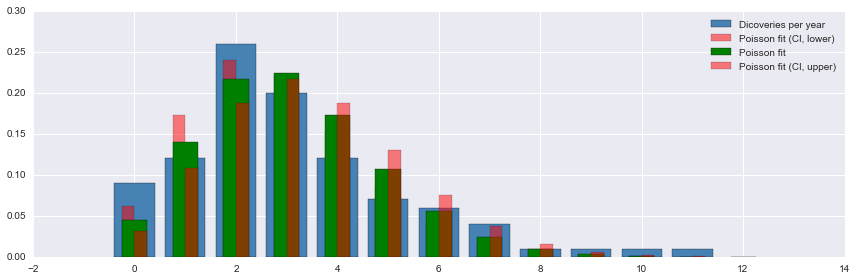

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue",  align='center', label='Dicoveries per year') 
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green",  align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red",  alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, upper)')

ax.legend()
fig.tight_layout()
fig.savefig("ch14-discoveries-per-year.pdf")

# Time Series

In [139]:
df = pd.read_csv("temperature_outdoor_2014.csv", header=None,delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

In [140]:
df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]

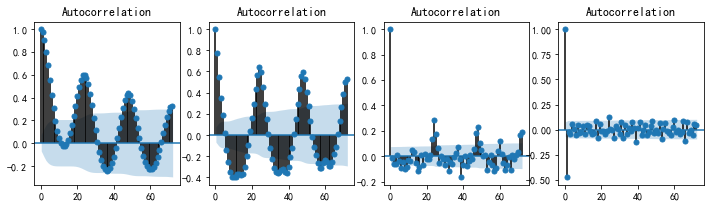

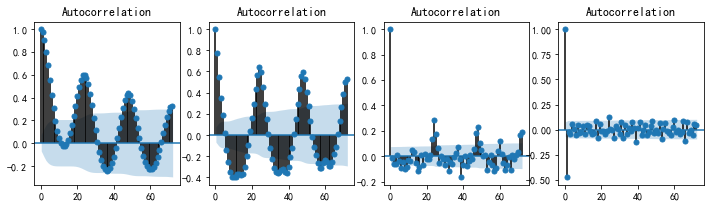

In [142]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72,ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72,ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(),lags=72, ax=axes[3])

In [143]:
model = sm.tsa.AR(df_march.temp)

In [144]:
result = model.fit(72)

In [145]:
sm.stats.durbin_watson(result.resid)

1.9985623006352975

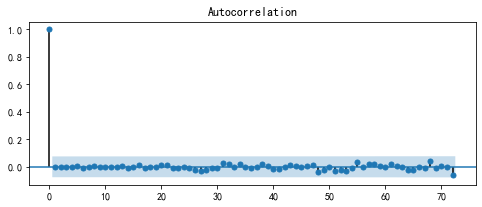

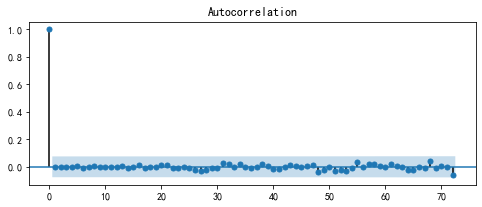

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)

In [147]:
temp_3d_forecast = result.predict("2014-04-01", "2014-04-4")

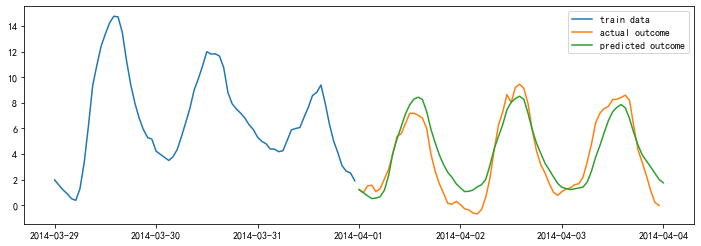

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:],label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72],label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,temp_3d_forecast, label="predicted outcome")

ax.legend()